#Punto 2 - Vino
###Por Sergio Hernández Charpak y Andrés Peñaranda García
####Enunciado
Utilizando los datos sobre vino escriba un notebook de IPython / Jupyter que clasifique de la mejor manera los datos usando: <b>k-means</b> (¿cuántos clusters son el numero óptimo?), <b>PCA</b> (¿cuántas componentes son las óptimas?) y <b>random forests</b> (¿cuántos árboles son las óptimos?). Justifique cuál de los tres metodos produce los mejores resultados de clasificación en este caso.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


####Importación de los datos con Pandas
Primero que todo debemos importar los datos con pandas. Nos basamos en el super tutorial: http://tott-meetup.readthedocs.org/en/latest/ donde juegan con la calidad de los vinos. Acá nosotros cogemos los datos wine-data y no los de wine-quality que son los usados en el tutorial.


In [2]:
import pandas as pnd

In [3]:
data_folder = './data/'
wine_file = data_folder + 'wine.data'

En el archivo wine.names están descritos los nombres de las columnas del archivo. 
<ul>
<li>Alcohol</li>
<li>Malic acid</li>
<li>Ash</li>
<li>Alcalinity of ash  </li>
<li>Magnesium</li>
<li>Total phenols</li>
<li>Flavanoids</li>
<li>Nonflavanoid phenols</li>
<li>Proanthocyanins</li>
<li>Color intensity</li>
<li>Hue</li>
<li>OD280/OD315 of diluted wines</li>
<li>Proline </li>
</ul>

In [4]:
wines_data = pnd.read_csv(wine_file, header=None, names=['ID_CLASS', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [5]:
wines_data.head()

,ID_CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Ahora pre-procecemos los datos

In [6]:
from sklearn.preprocessing import scale

In [7]:
Y = wines_data['ID_CLASS']
del wines_data['ID_CLASS']
X = scale(wines_data)

Ya tenemos de un lado los datos normalizados (X) y por otro lado la clasificación ya hecha (Y).

## K-Means
### ¿cuántos clusters son el numero óptimo? 
<p> La documentación de K-Means se encuentra en: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html </p>

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [9]:
n_max_clusters = 50
inertias_kmeans = np.zeros(n_max_clusters)
silhouette_avg_kmeans = np.zeros(n_max_clusters)

Es dificil ver un error para esto. 
<p>Por ahora lo que tenemos es la propiedad de inertia_ que se define como:</p>
Sum of distances of samples to their closest cluster center.
<p>O sea es la suma de las distancias de los puntos con sus respectivos centroides de cluster</p>
Tambien vamos a ver el <b>silhouette score</b> para cada numero de clusters. Esta medida, definida aca http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html , esta relacionada con la reparticion de las distancias por cada cluster realizado. Entre más cercana a 1 significa que el cluster realizado es más uniforme (en otras palabras, bien hecho).

In [10]:
for i in range (1,n_max_clusters+1):
    #Hace el fit de K-Means
    das_estimator = KMeans(n_clusters=i)
    das_fit = das_estimator.fit(X,Y)
    das_predict = das_fit.predict(X)
    inertias_kmeans[i-1] = das_fit.inertia_
    if i!= 1:
        silhouette_avg_kmeans[i-1] = silhouette_score(X, das_predict)

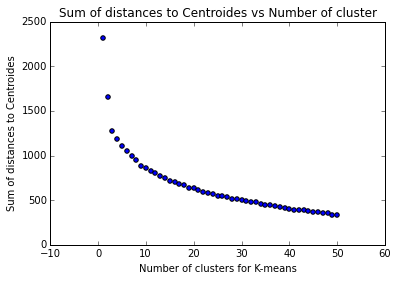

In [11]:
#Grafiquemos los resultados
x_chiquito = np.linspace(1,n_max_clusters,n_max_clusters)
fig = plt.figure()
plt.scatter(x_chiquito, inertias_kmeans)
plt.ylabel("Sum of distances to Centroides")
plt.xlabel("Number of clusters for K-means")
plt.title("Sum of distances to Centroides vs Number of cluster")

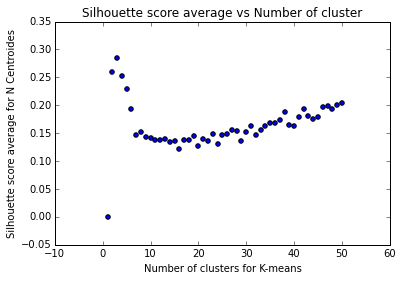

In [12]:
fig = plt.figure()
plt.scatter(x_chiquito, silhouette_avg_kmeans)
plt.ylabel("Silhouette score average for N Centroides")
plt.xlabel("Number of clusters for K-means")
plt.title("Silhouette score average vs Number of cluster")

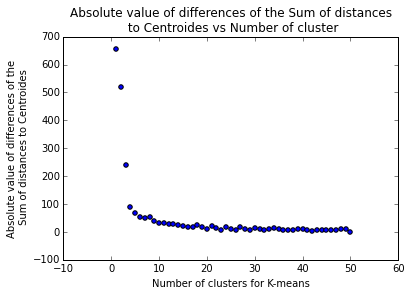

In [13]:
diff_inertias = np.abs(np.gradient(inertias_kmeans))
fig = plt.figure()
plt.scatter(x_chiquito, diff_inertias)
plt.ylabel("Absolute value of differences of the  \n Sum of distances to Centroides")
plt.xlabel("Number of clusters for K-means")
plt.title("Absolute value of differences of the Sum of distances \n to Centroides vs Number of cluster")

<p> Podemos observar que esta el cambio de esta "intertia" es muy alto hasta 4 clusters.</p>
<p> Tambien podemos ver que el silhouette score es alto hasta 4 clusters </p> 

Al observar estas diferencias podemos observar que a partir de 4 centroides se estabiliza alrededor de un valor minimo. <p> Por lo tanto el numero óptimo de clusters debe ser o <b> 3 o 4</b>. Debemos calcular la eficiencia de K-Means con 3 cluster y 4 clusters para decidir entre ambos. </p>
<p> Para determinar cual es mejor, hacemos un análisis de silhouette basado en: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html </p>

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

('For n_clusters =', 3, 'The average silhouette_score is :', 0.2848589191898987)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.2451912932377216)


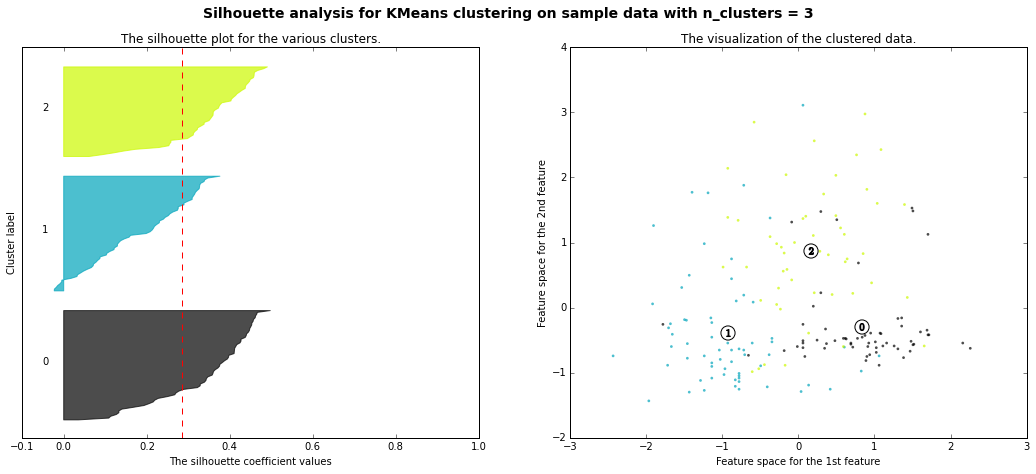

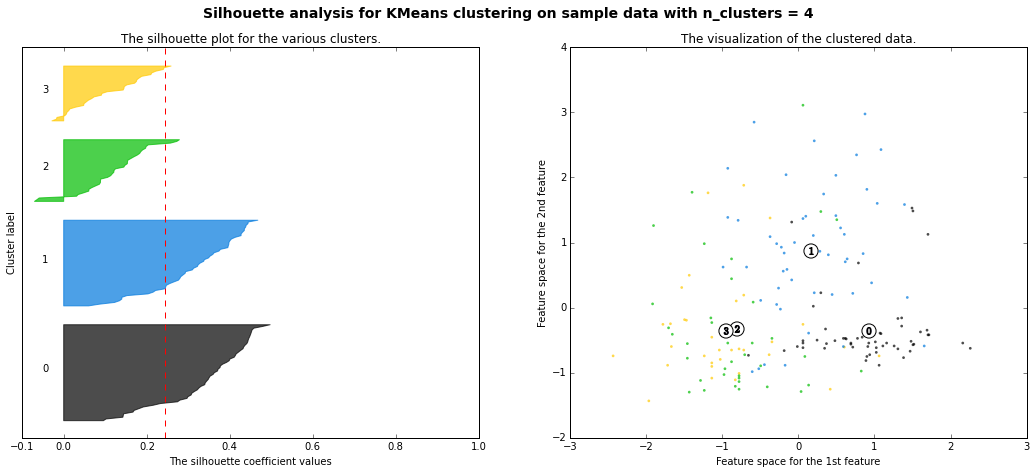

In [15]:
for n_clusters in range(3,5):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

<p>Podemos observar que para 4 clusters los cluster 2 y 3 están en su inmensa mayoria con un silhouette score por debajo de la media, mientras que para 3 clusters cada cluster tiene valores de silhouette por debajo y encima de la media. </p>
<p> Por lo tanto podemos concluir que el <b> número óptimo de clusters para K-Means es 3 </b> </p>

### Desempeño de K-means

Podemos calcular cuantos puntos quedan mal clasificados

In [16]:
#ya sabemos que 3 es el numero optimo
das_estimator = KMeans(n_clusters = 3)
das_fit = das_estimator.fit(X,Y)
das_predict = das_fit.predict(X)
#Le sumamos 1 ya que da resultados en [0;2] cuando Y tiene valores en [1;3]
das_predict_Y = das_predict + 1
y = Y.values

In [17]:
n_wrong_class = 0
for i in range (0, len(Y)):
    if y[i] != das_predict_Y[i]:
        n_wrong_class += 1
print str(n_wrong_class) + " vinos quedaron mal clasificados."
porcentaje = 100 * float((len(Y) - n_wrong_class ))/ float(len(Y)) 
print "La eficiencia de K-Means es entonces: " + str(porcentaje)+"%"

6 vinos quedaron mal clasificados.
La eficiencia de K-Means es entonces: 96.6292134831%


## PCA (Principal component analysis)
### ¿Cuántas componentes son las óptimas? 
<p> La documentación de PCA se encuentra en: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html </p>

In [18]:
from sklearn.decomposition import PCA

In [19]:
n_components_PCA = 13

<p> Con PCA buscamos a explicar un porcentaje de la varianza con el número de componentes. Para ello usamos el atributo explained_variance_ratio_ </p>
<p> Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0 </p>

In [20]:
pca = PCA(n_components=n_components_PCA)
das_fit = pca.fit(X,Y)
das_var_ratio = das_fit.explained_variance_ratio_

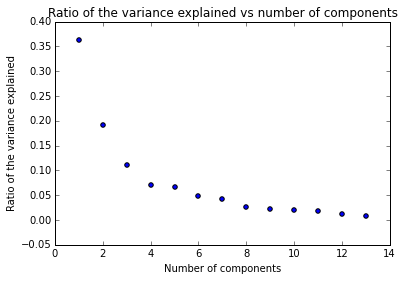

In [21]:
x_chiquito = linspace(1,13,13)
fig = plt.figure(1)
plt.scatter(x_chiquito, das_var_ratio)
plt.ylabel("Ratio of the variance explained")
plt.xlabel("Number of components")
plt.title("Ratio of the variance explained vs number of components")

<p> Nosotros debemos escoger un umbral para el porcentaje de la varianza que buscamos explicar. </p>
<p> En la documentación escogen 95%, vamos a hacer igual </p>

In [22]:
var_threshold = 0.95
sum_var_ratio = 0
for i in range(0,len(das_var_ratio)):
    sum_var_ratio += das_var_ratio[i]
    if(sum_var_ratio >= var_threshold ):
        print "Con " + str(i+1) + " componentes se explica " + str(sum_var_ratio) + "% de la varianza"
        break

Con 10 componentes se explica 0.961697168445% de la varianza


<p> Este resultado nos indica que 10 componentes es el número optimo de componentes. </p>
<p> Miremos si le aplicamos reducción de dimensión </p>

In [23]:
n_components_opt = 10 
pca_opt = PCA(n_components=n_components_opt)
das_fit_reduced = pca_opt.fit_transform(X, Y)

<p>Ya tenemos el conjunto de datos reducidos. Sin embargo solo con PCA no es evidente clasificar los datos y calificar dicha clasificacion. </p>

## Random forests
### ¿Cuántos árboles son las óptimos? 
<p> La documentación de Random Forest se encuentra en:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</p>

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
n_trees_max = 50

<p> Vamos a tener un set de entrenamiento y un set de prueba para probar el bosque</p>
<p> Para ello utilizamos la funcion train test split: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html que hace esta separacion al azar </p>

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
train_test_ratio = 0.4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=train_test_ratio, random_state=42)

In [28]:
square_sum = np.zeros(n_trees_max)
n_wrong_trees = np.zeros(n_trees_max)
for i in range(n_trees_max):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(X_train, Y_train)
    prediction = rf.predict(X_test)
    square_sum[i] = sum((prediction - Y_test)**2)
    failed_wines = 0
    for j in range (0, len(prediction)):
        if(prediction[j] != Y_test.values[j]):
            failed_wines += 1
    n_wrong_trees[i] = failed_wines 

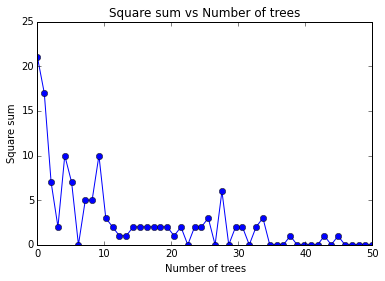

In [29]:
x_chiquito = np.linspace(0, n_trees_max, n_trees_max)
fig = plt.figure()
plt.plot(x_chiquito, square_sum, "-o")
plt.ylabel("Square sum ")
plt.xlabel("Number of trees")
plt.title("Square sum vs Number of trees")


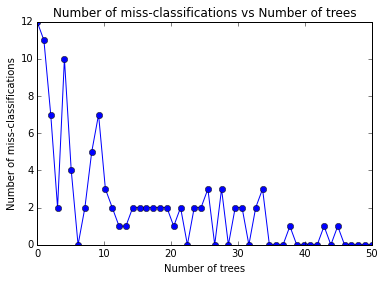

In [30]:
fig = plt.figure()
plt.plot(x_chiquito, n_wrong_trees, "-o")
plt.ylabel("Number of miss-classifications")
plt.xlabel("Number of trees")
plt.title("Number of miss-classifications vs Number of trees")

Parece que desde alrededor de 8 arboles se parece estabilizar. Hagamos más pruebas.

In [31]:
n_tests = 500
n_trees_max = 10
efficiencies = np.zeros((n_trees_max, n_tests))
n_wrong_trees = np.zeros((n_trees_max, n_tests))
for k in range (n_tests):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=train_test_ratio, random_state=15)
    for i in range(n_trees_max):
        rf = RandomForestClassifier(n_estimators=i+1)
        rf.fit(X_train, Y_train)
        prediction = rf.predict(X_test)
        failed_wines = 0
        for j in range (0, len(prediction)):
            if(prediction[j] != Y_test.values[j]):
                failed_wines += 1
        n_wrong_trees[i,k] = failed_wines 
        efficiencies[i,k] = 100 * float(len(prediction) - failed_wines) / len(prediction)

Ahora obtenemos medias y desviaciones.

In [32]:
efficiencies_mean = np.zeros(n_trees_max)
efficiencies_std = np.zeros(n_trees_max)
for i in range(n_trees_max):
    efficiencies_mean[i] = np.mean(efficiencies[i,:])
    efficiencies_std[i] = np.std(efficiencies[i,:])

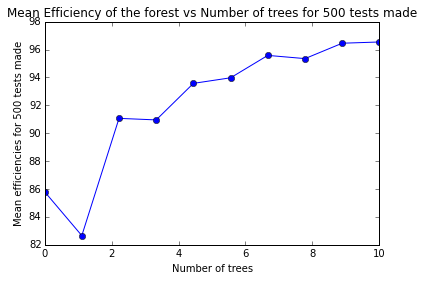

In [33]:
fig = plt.figure()
x_chiquito = np.linspace(0, n_trees_max, n_trees_max)
plt.plot(x_chiquito, efficiencies_mean, "-o")
plt.ylabel("Mean efficiencies for "+str(n_tests) +" tests made")
plt.xlabel("Number of trees")
plt.title("Mean Efficiency of the forest vs Number of trees for "+str(n_tests) +" tests made")

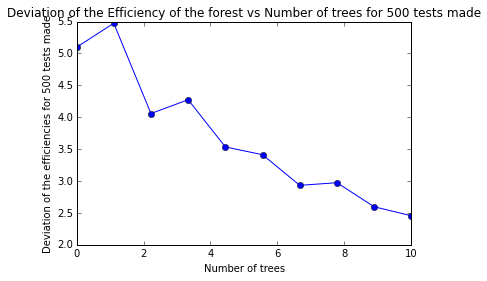

In [34]:
fig = plt.figure()
plt.plot(x_chiquito, efficiencies_std, "-o")
plt.ylabel("Deviation of the efficiencies for "+str(n_tests) +" tests made")
plt.xlabel("Number of trees")
plt.title("Deviation of the Efficiency of the forest vs Number of trees for "+str(n_tests) +" tests made")

In [35]:
var_threshold = 0.95 *100
for i in range(0,n_trees_max):
    if(efficiencies_mean[i] >= var_threshold ):
        print "Con " + str(i) + " árboles se llega a " + str(efficiencies_mean[i]) + "% de eficiencia en la clasificación"
        break

Con 6 árboles se llega a 95.5777777778% de eficiencia en la clasificación


Podemos observar que si estamos buscando una eficiencia de más del 95% entonces <b>6 árboles</b> es el número óptimo de árboles.

## SVM (Supported Vector Machines)
### Para clasificar 
<p> La documentación de SVM se encuentra en:  http://scikit-learn.org/stable/modules/svm.html</p>

In [36]:
from sklearn import svm
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV

Primero que todo vamos a obtener los mejores parametros C y gamma

In [37]:
gamma_range = np.logspace(-2, 2, 20)
C_range = np.logspace(-2, 2, 20)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = ShuffleSplit(len(Y), n_iter=10, test_size=0.1)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X,Y)
print("The best gamma and C={}, score={}".format(grid.best_params_, grid.best_score_))

The best gamma and C={'C': 0.18329807108324356, 'gamma': 0.069519279617756058}, score=1.0


In [38]:
best_c = grid.best_params_['C']
best_gamma = grid.best_params_['gamma']

Ahora formamos un modelo de clasificacion usando estos C y gamma con los datos de entrenamiento.

In [39]:
das_best = svm.SVC(kernel='rbf' , C = best_c, gamma = best_gamma)
das_fit = das_best.fit(X_train, Y_train)

Ahora hacemos la predicion y comparamos para obtener la eficiencia.

In [40]:
prediction = das_fit.predict(X_test)
n_wrong_class = 0
for i in range (0, len(Y_test)):
    if Y_test.values[i] != prediction[i]:
        n_wrong_class += 1
print str(n_wrong_class) + " vinos quedaron mal clasificados."
porcentaje = 100 * float((len(Y_test) - n_wrong_class ))/ float(len(Y_test)) 
print "La eficiencia de SVM con un kernel rbf es entonces: " + str(porcentaje)+"%"

2 vinos quedaron mal clasificados.
La eficiencia de SVM con un kernel rbf es entonces: 97.2222222222%


##Conclusiones
<p>Podemos observar que tuvimos buenos resultados en todos los métodos en general. K-means parece ser el más intuitivo para el problema en específico. Sin embargo, Random Forest y SVM dan excelentes resultados (aunque sean más costosos). </p>
<p> Para PCA no se vio bien como usarlo para clasificar. Se podría utilizar el conjunto de datos de menor dimensionalidad y aplicarlo a los otros modelos. Se pasarían de 13 parámetros a 10 parámetros y posiblemente se mejoren los tiempos de Random Forest y SVM (que son los que más se demoran hasta ahora). </p>